#   <font color='rainbow'> Projet développement logiciel

##  <font color='rainbow'> Partie Python

###  <font color='rainbow'> TP°1 Noté

##  <font color='green'> Exercice 1 - Le jeu de la vie

<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F1.jpg" width="500">

<p style='text-align: justify;'> Le jeu de la vie est un automate cellulaire mis au point par le mathématicien britannique John Horton Conway en 1970. Il constitue l'exemple le plus connu d'un automate cellulaire. Le "jeu" est en fait un jeu à zéro joueur, ce qui signifie que son évolution est déterminée par son état initial et ne nécessite aucune intervention de la part d'un humain. On interagit avec le jeu de la vie en créant une configuration initiale ; il ne reste plus alors qu'à observer son évolution. </p>

<p style='text-align: justify;'> L'univers du jeu est une grille orthogonale bidimensionnelle infinie de cellules carrées (dans la suite du projet on supposera que la grille est carrée et de taille finie pour éviter toute difficulté ; on supposera aussi que le pourtour de la grille est toujours inactif/mort), chacune d'entre elles se trouvant dans l'un des deux états possibles : </p>

* **vivant**

* **mort**

Chaque cellule interagit avec ses huit voisins, qui sont les cellules directement adjacentes horizontalement, verticalement ou en diagonale, comme indiqué sur la Figure 1. À chaque étape, les transitions suivantes se produisent :

**a)** Toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante (naissance), cf. **Figure 2a**

**b)** Toute cellule vivante avec 2 ou 3 voisins vivants vit inchangée jusqu'à la génération suivante (équilibre), cf. **Figure 2b**

**c)** Toute cellule vivante ayant 4 voisins vivants (mort par étouffement), cf. **Figure 2c**

**d)** Toute cellule vivante ayant 0 ou 1 voisin vivant décède (mort par isolement), cf. **Figure 2d**.


<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F2.jpg" width="700">

<p style='text-align: justify;'> Le modèle initial constitue la "graine" du système. La première génération est créée en appliquant les règles ci-dessus simultanément à chaque cellule de la graine - les naissances et les décès se produisent simultanément. Ainsi chaque génération est une fonction de la précédente. Les règles continuent d'être appliquées de manière répétée pour créer d'autres générations 1 . </p>

**ATTENTION :** La "carte" (on utilisera une liste de liste pour la représenter) est équipée d'une frontière de 0 : cela permet d'accélérer légèrement les calculs en évitant d'avoir des tests spécifiques pour les frontières lors du comptage du nombre de voisins. Ainsi la "couronne" du tour de la carte sera fixée à zéro. </p>

### Implémentation sans numpy

On va fournir dessous le code pure Python pour coder ce jeu. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0. Tout d'abord on définit la fonction **calcul_nb_voisins** :

In [1]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
            + Z[x-1][y] + 0 +Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

Appliquons la fonction précédente à la liste (de liste) Z suivante :

In [59]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

Expliquons ce que représente la sortie obtenue **N=calcul_nb_voisins(Z)**. 

Cette fonction, et toutes les fonctions définies dans la suite seront placées dans un fichier **utils.py** que l'on appellera depuis le notebook.

In [60]:
N = calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

Cette sortie donne une matrice N de même taille que Z tel que $N_{ij}$ est le nombre de voisins vivants parmi les 8 voisins de la cellule $Z_{ij}$.  
$\textit{Exemple :}$ La cellule $Z_{34}$ a comme voisins vivants les cellulles $Z_{24}, Z_{43}$ et $Z_{44}$

In [61]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    """
    On parcourt avec la boucle for chaque cellule de Z avec son nombre de voisins vivants.
    Si une cellule vivante a 0, 1 ou 4 voisins vivants on lui affecte la valeur 0 (mort).
    Si une cellule morte a exactement 3 voisins vivants on lui affecte 1 (naissance).
    Tout autre cas garde la meme valeur.
    """
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

"""
Cette fonction fait donc une simulation d'un tour du jeu pour une matrice Z donnée.
"""

"\nCette fonction fait donc une simulation d'un tour du jeu pour une matrice Z donnée.\n"

In [62]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Dans cette question on se propose pour la liste Z ci-dessus d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle for. On utilisera la fonction subplot de matplotlib pour afficher sur 2 lignes et 5 colonnes ces 10 matrices. De plus on devra transformer ces listes en array pour pouvoir utiliser la fonction imshow de matplotlib.

Z 0 = [[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 1 = [[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Z 2 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]
Z 3 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 4 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 5 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 6 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 7 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 8 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]
Z 9 = [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


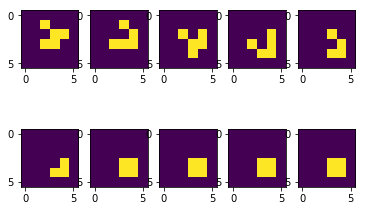

In [168]:
import matplotlib.pyplot as plt
import numpy as np

Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
fig, ax = plt.subplots(2,5)

for i in range(10):
    Z = iteration_jeu(Z)
    print('Z',i,'=', np.matrix(Z))
    if (i < 5) :
        ax[0, i].imshow(Z, interpolation = 'nearest') #pas necessaire de mettre nearest, on peut checker les autres formes 
    else :
        ax[1, i-5].imshow(Z)
plt.show()

In [145]:
plt.imshow?

Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?

### Implémentation avec numba

Reprendre la section précédente avec des fonctions utilisant numba et la compilation **"jit"**. On proposera en particulier un protocole expérimentale pour comparer les temps de calculs avec ou sans cet apport.

Créer un widget dont le curseur permet de contrôler les itérations (par exemple de 0 à 30) du jeu de la vie quand on initialise avec la **matrice Z_huge** suivante :

In [ ]:
import numpy as np  # raccourci usuel
import matplotlib.pyplot as plt # raccourci usuel

In [ ]:
Z_huge = np.zeros((100, 100))

Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np

On pourra diminuer la taille des matrices en jeux pour rendre fluide le widget si besoin s'en fait sentir sur votre machine.

##  <font color='green'> Exercice 2 - Régression linéaire

On va s'intéresser dans la suite à la base de données **MNIST** qui représente des chiffres numérisés, dont on connaît une "étiquette" associée parmi les chiffres **(0, 1, . . . , 9)**.

Charger la base de données **MNIST** avec la commande from **sklearn.datasets** import **fetch_mldata** (ou bien avec from sklearn.datasets import fetch_openml si votre version de sklearn est plus récente). On pourra par exemple utiliser dans le premier cas :

In [ ]:
# from sklearn.datasets import fetch_mldata

from sklearn.datasets import fetch_openml 

In [ ]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

Transformer X et y pour ne garder que les cas des chiffres 3 et 7. Visualiser avec **imshow** un exemple de chaque classe d'image (un X donc), en utilisant un reshape adapté.

<p style='text-align: justify;'> Utiliser la fonction LogisticRegression pour apprendre un modèle de classiffication sur l'intégralité des données (on choisira un cas sans ordonnée à l'origine, i.e., l'option fit_intercept=False). Le modèle prédit alors la classe d'une image en considérant une image comme un vecteur x et en choisissant l'une des deux classes selon le signe de $w^Tx$, où w est le vecteur appris par la méthode et stocké dans l'attribut .coef_. </p>

En utilisant le vecteur w de cette manière, proposer un widget qui investigue l'impact de la transformation de l'image par l'opération :  $$x_{mod} = x - \alpha \frac{w^Tx}{||w||^2}$$

On prendra pour x l'image associé au chiffre 7 de la question précédente, et le widget fera varier $\alpha$ de 0.1 à 100 de 0.1 en 0.1. Pour cela on définira une fonction **fig_digit** (à ajouter de nouveau dans le fichier **utils.py**), qui contient une **docstring** décrivant son fonctionnement.

Créer un film que l'on importera en **HTML** dans le notebook, et qui représente l'évolution de l'image ainsi créer en fonction de $\alpha$. On pourra s'inspirer de la page http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ pour plus d'information concernant la création de films.

Décrire mathématiquement ce que paramétrise le paramètre $\alpha > 0$.

Proposer une analyse en composante principale (: Principal Component Analysis (PCA)), pour visualiser la base de données dans un espace de dimension 2, en ajustant les couleurs selon la classe des données. On pourra s'inspirer de l'exemple : https://scikitlearn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glrauto-examples-decomposition-plot-incremental-pca-py